This is the code used to analyze the words of each dataset.
We can run this code with the different datasets (data_100_cleaned.pkl, data_75_cleaned.pkl, data_m5s_cleaned.pkl) to have an insight in what are the words most used.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_pickle('data_100_cleaned.pkl')

In [0]:
df.head()

,__label__,tweets
0,__label__Right,problema risolve rinviando primavera vorrebbe ...
1,__label__Left,lica smocci lica smocci direi ripensare strate...
3,__label__Right,gioved\ \ dicembre repubblica impuniti cos\ \ ...
4,__label__Left,bretagna pi ricco industrializzato pianeta con...
6,__label__Right,parassiti complimenti capitano follia pura vam...


In [0]:
# remove'rt'
import re
df["tweets"]=df["tweets"].apply(lambda s: ' '.join(re.sub("rt", "", s).split()))

In [0]:
# divide in two dataframes right and left voters
df_right = df[df.loc[:,'__label__']!='__label__Right']
df_left = df[df.loc[:,'__label__']!='__label__Left']

In [0]:
#  Create a list of of lists containing the words for each tweet for the two groups
words_in_tweet_right = [tweet.split() for tweet in df_right['tweets']]
words_in_tweet_left = [tweet.split() for tweet in df_left['tweets']]
print(type(words_in_tweet_right))
print(type(words_in_tweet_left))

<class 'list'>
<class 'list'>


In [0]:
# libraries to go on..
import itertools
import collections

In [0]:
# List of all words across tweets
all_words_right = list(itertools.chain(*words_in_tweet_right))
all_words_left = list(itertools.chain(*words_in_tweet_left))

In [0]:
# Function to remove further noise from the text
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]

In [0]:
# Removing stop words
stop_words=['\\x','\\','f\\x','pi','perch','f',')','%','sar','','pi ','m','s','e','/','(','@','cose','vuole',
           'paito','bella','foto','maio','b','davvero','andare','domani','\\xf','\\xe','\\xb','f\\','\\n','pi\\','l\\xe',
           'd','perch\\','f\\xf','\\xef\\xb','d\\xe','d\\x','a','cos\\','nn','\\n\\n','matteo','claudio']
all_words_right=removeStopwords(all_words_right, stop_words)
all_words_left=removeStopwords(all_words_left,stop_words)

In [0]:
# Count of words used in 'left' tweets
counts_left = collections.Counter(all_words_left)
# List of the most common 30
counts_left.most_common(30)

[('italia', 59212),
 ('salvini', 46493),
 ('pd', 37366),
 ('italiani', 31491),
 ('lega', 27773),
 ('roma', 25309),
 ('euro', 20945),
 ('conte', 18904),
 ('renzi', 18422),
 ('politica', 17127),
 ('presidente', 16491),
 ('legge', 15897),
 ('soldi', 15580),
 ('grillo', 15564),
 ('stelle', 15293),
 ('sinistra', 15011),
 ('video', 14448),
 ('cittadini', 14036),
 ('vero', 13287),
 ('voto', 12383),
 ('movimento', 12043),
 ('popolo', 11765),
 ('europa', 11409),
 ('piazza', 11326),
 ('italiano', 10941),
 ('parla', 10757),
 ('claudio', 10624),
 ('matteo', 10299),
 ('amici', 10026),
 ('camera', 9862)]

In [0]:
# Count of word used by 'right' tweets
counts_right = collections.Counter(all_words_right)
# List of most common 30 
counts_right.most_common(30)

[('salvini', 35205),
 ('italia', 30988),
 ('pd', 16991),
 ('lega', 13739),
 ('italiani', 13163),
 ('roma', 12543),
 ('renzi', 12520),
 ('politica', 12474),
 ('vero', 11092),
 ('europa', 9624),
 ('presidente', 9609),
 ('storia', 9139),
 ('euro', 9098),
 ('problema', 8187),
 ('legge', 8180),
 ('sinistra', 7974),
 ('donne', 7727),
 ('cazzo', 7692),
 ('parla', 7653),
 ('piazza', 7636),
 ('soldi', 7634),
 ('vedere', 7618),
 ('italiano', 7494),
 ('video', 7272),
 ('milano', 7229),
 ('conte', 7198),
 ('nuova', 7054),
 ('credo', 6936),
 ('buon', 6829),
 ('buona', 6814)]

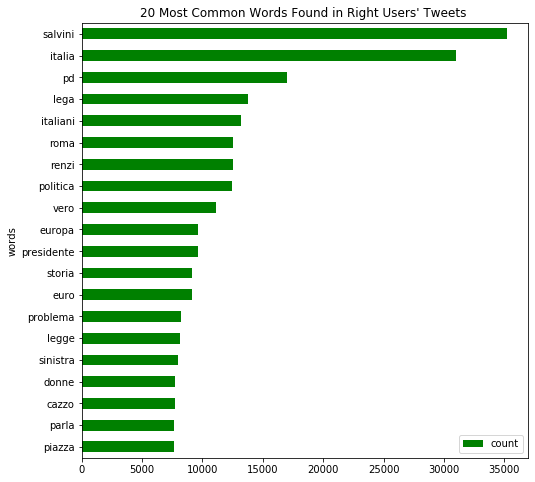

In [0]:
# for both ranking create a pandas Dataframe and plot it 
most_common_right = pd.DataFrame(counts_right.most_common(20),
                             columns=['words', 'count'])
most_common_left = pd.DataFrame(counts_left.most_common(20),
                             columns=['words', 'count'])


fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph for right users
most_common_right.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("20 Most Common Words Found in Right Users' Tweets ")

plt.show()

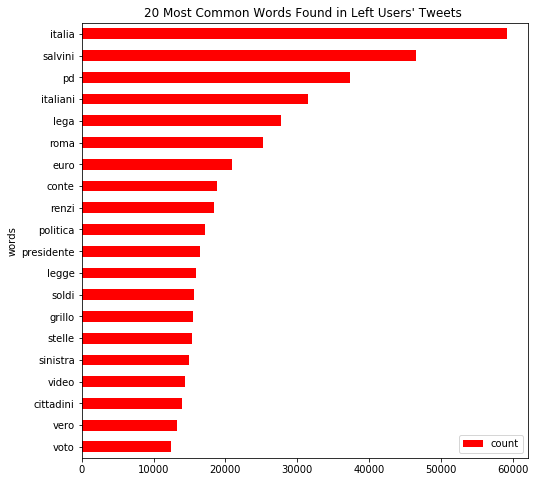

In [0]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph for left users
most_common_left.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("20 Most Common Words Found in Left Users' Tweets ")

plt.show()

In [0]:
# Further frequency count leaving out the words which are among the most common for both groups
key_words=['salvini','italia','pd','italiani','lega','roma','euro','conte','renzi','euro','sinistra','destra']
all_words_right_nokey=removeStopwords(all_words_right, key_words)
all_words_left_nokey=removeStopwords(all_words_left,key_words)

In [0]:
# Count of word used by 'right' tweets
counts_right_nokey = collections.Counter(all_words_right_nokey)
# List of most common 30 
counts_right_nokey.most_common(30)

[('politica', 12474),
 ('vero', 11092),
 ('europa', 9624),
 ('presidente', 9604),
 ('storia', 9139),
 ('problema', 8187),
 ('legge', 8179),
 ('donne', 7725),
 ('cazzo', 7692),
 ('parla', 7653),
 ('piazza', 7636),
 ('soldi', 7634),
 ('vedere', 7617),
 ('italiano', 7494),
 ('video', 7272),
 ('milano', 7229),
 ('nuova', 7054),
 ('credo', 6936),
 ('buon', 6829),
 ('buona', 6814),
 ('parlare', 6775),
 ('tweet', 6644),
 ('voto', 6637),
 ('almeno', 6483),
 ('donna', 6266),
 ('viene', 6246),
 ('punto', 6101),
 ('tanti', 6039),
 ('ragione', 5969),
 ('mare', 5925)]

In [0]:
# Count of word used by 'right' tweets
counts_left_nokey = collections.Counter(all_words_left_nokey)
# List of most common 30 
counts_left_nokey.most_common(30)

[('politica', 17127),
 ('presidente', 16491),
 ('legge', 15897),
 ('soldi', 15580),
 ('grillo', 15564),
 ('stelle', 15293),
 ('video', 14448),
 ('cittadini', 14036),
 ('vero', 13287),
 ('voto', 12383),
 ('movimento', 12043),
 ('popolo', 11765),
 ('europa', 11409),
 ('piazza', 11326),
 ('italiano', 10941),
 ('parla', 10757),
 ('amici', 10026),
 ('camera', 9862),
 ('storia', 9836),
 ('migranti', 9725),
 ('vedere', 9662),
 ('parlamento', 9377),
 ('capito', 9313),
 ('parlare', 9299),
 ('vogliono', 9018),
 ('problema', 8992),
 ('f\\xe', 8980),
 ('buon', 8977),
 ('buona', 8904),
 ('nuova', 8805)]

# SENTIMENT ANALYSIS

In [0]:
# Since frequency counts don't discriminate much, we'll compute TF-IDF of each word  
# appearing in both groups tweets
# Clean the list of lists of words from the beginning
def remove_Stopwords(wordlist, stopwords):
    for i in range(len(wordlist)):
        wordlist[i]=[w for w in wordlist[i] if w not in stopwords]
    return wordlist
    
#
words_in_tweet_right_cleaned=remove_Stopwords(words_in_tweet_right,stop_words)
#
words_in_tweet_left_cleaned=remove_Stopwords(words_in_tweet_left,stop_words)

In [0]:
words_in_tweet_right_cleaned[0]

['lica',
 'smocci',
 'lica',
 'smocci',
 'direi',
 'ripensare',
 'strategia',
 'scelta',
 'pooni',
 'lica',
 'smocci',
 'raccolgono',
 'olive',
 'albero',
 'lica',
 'smocci',
 'poverino',
 'disastrato',
 'fara',
 'fretta',
 'buongiorno',
 'mourad',
 'lica',
 'smocci',
 'piove',
 'tipo',
 'blade',
 'runner',
 'scivola',
 'fango',
 'almeno',
 'scivolano',
 'cani',
 'lica',
 'smocci',
 'bello',
 'ulivi',
 'lica',
 'smocci',
 'soggetto',
 'fuoco',
 'lica',
 'smocci',
 'legge',
 'angolazioni',
 'lica',
 'smocci',
 'condominio',
 'assolutamente',
 'lica',
 'smocci',
 'pensa',
 'piacciono',
 'terra',
 'aspetto',
 'levarle',
 'lica',
 'smocci',
 'main',
 'confusione',
 'lica',
 'smocci',
 'vabb',
 'chisseneimpoa',
 'contenti',
 'autunno',
 'lica',
 'smocci',
 'lica',
 'smocci',
 'cibo',
 'domenica',
 'finisce',
 'discorsi',
 'lica',
 'smocci',
 'ahahaahha',
 'lica',
 'smocci',
 'manco',
 'oscar',
 'wilde',
 'pensieri',
 'depressi',
 'lica',
 'smocci',
 'troppa',
 'memoria',
 'ricordo',
 'barze

In [0]:
# build dictionaries where keys are each of the words used associated with the id of the tweets in which they appear
# 
DF_right = {}
for i in range(len(words_in_tweet_right_cleaned)):
    tokens = words_in_tweet_right_cleaned[i]
    for w in tokens:
        try:
            DF_right[w].add(i)
        except:
            DF_right[w] = {i}
## Right group
DF_left = {}
for i in range(len(words_in_tweet_left_cleaned)):
    tokens = words_in_tweet_left_cleaned[i]
    for w in tokens:
        try:
            DF_left[w].add(i)
        except:
            DF_left[w] = {i}

In [0]:
type(DF_right['lica'])

set

In [0]:
# replace the list with count of how many tweets contain the word
for i in DF_right:
    DF_right[i]=len(DF_right[i])
#
for i in DF_left:
    DF_left[i]=len(DF_left[i])

In [0]:
# number of unique words 
total_vocab_right=[x for x in DF_right]
total_vocab_left=[x for x in DF_left]

In [0]:
import numpy as np
from collections import Counter

In [0]:
# Calculating TF-IDF
tf_idf_right = {}
for i in range(len(words_in_tweet_right_cleaned)):
    tokens = words_in_tweet_right_cleaned[i]
    counter = Counter(tokens)
    for token in np.unique(tokens):
        tf = counter[token]/len(words_in_tweet_right_cleaned[i])
        df = DF_right[token]
        idf = np.log(len(words_in_tweet_right_cleaned)/(df+1))
        tf_idf_right[i, token] = tf*idf

In [0]:
tf_idf_right

{(0, '#'): 0.0001788802989599398,
 (0, '(('): 0.0002448759398325238,
 (0, '()'): 0.0001332823045261661,
 (0, '(a'): 7.275192569149737e-05,
 (0, '(afterhours)'): 0.00036524185449331533,
 (0, '(altro'): 0.00017665094583266,
 (0, '(antonio'): 0.0002927272117232663,
 (0, '(as'): 0.00023195954996714927,
 (0, '(bambini'): 0.00024136675820388083,
 (0, '(che'): 0.0001245820135235067,
 (0, '(chi'): 0.0003367354591993935,
 (0, '(cit)'): 0.0003063621940376094,
 (0, '(come'): 8.983717325890028e-05,
 (0, '(con'): 8.195281317354783e-05,
 (0, '(da'): 9.98466542924256e-05,
 (0, '(dei'): 0.00021045205075248828,
 (0, '(del'): 0.00016646973105703694,
 (0, '(delle'): 0.00023805821375841034,
 (0, '(di'): 7.657402464513744e-05,
 (0, '(doberman)'): 0.00036524185449331533,
 (0, '(dove'): 0.0001723612970624747,
 (0, '(e'): 0.0002241706573267188,
 (0, '(ezio'): 0.0005137897778797088,
 (0, '(fdi)'): 0.00020475396827892656,
 (0, '(forse'): 0.00015171560685995486,
 (0, '(forse)'): 0.00014958467532935076,
 (0, '(fs